<a href="https://colab.research.google.com/github/taminhtri2003/EMG-Signal-Processing-Library/blob/master/Lecture_04_2_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Import modules**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing

### **Loading the dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = 'drive/My Drive/VietAI/LinearRegression'
california_housing_train = pd.read_csv(path+"/california_housing_train.csv")
california_housing_test = pd.read_csv(path+"/california_housing_test.csv")

In [ ]:
california_housing_train = pd.read_csv("sample_data/california_housing_train.csv")
california_housing_test = pd.read_csv("sample_data/california_housing_test.csv")
california_housing_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [ ]:
california_housing_train.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
california_housing_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


### **Preprocessing the dataset**

In [ ]:
california_housing_train.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

In [ ]:
california_housing_test.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

### **Exploratory Data Analysis**

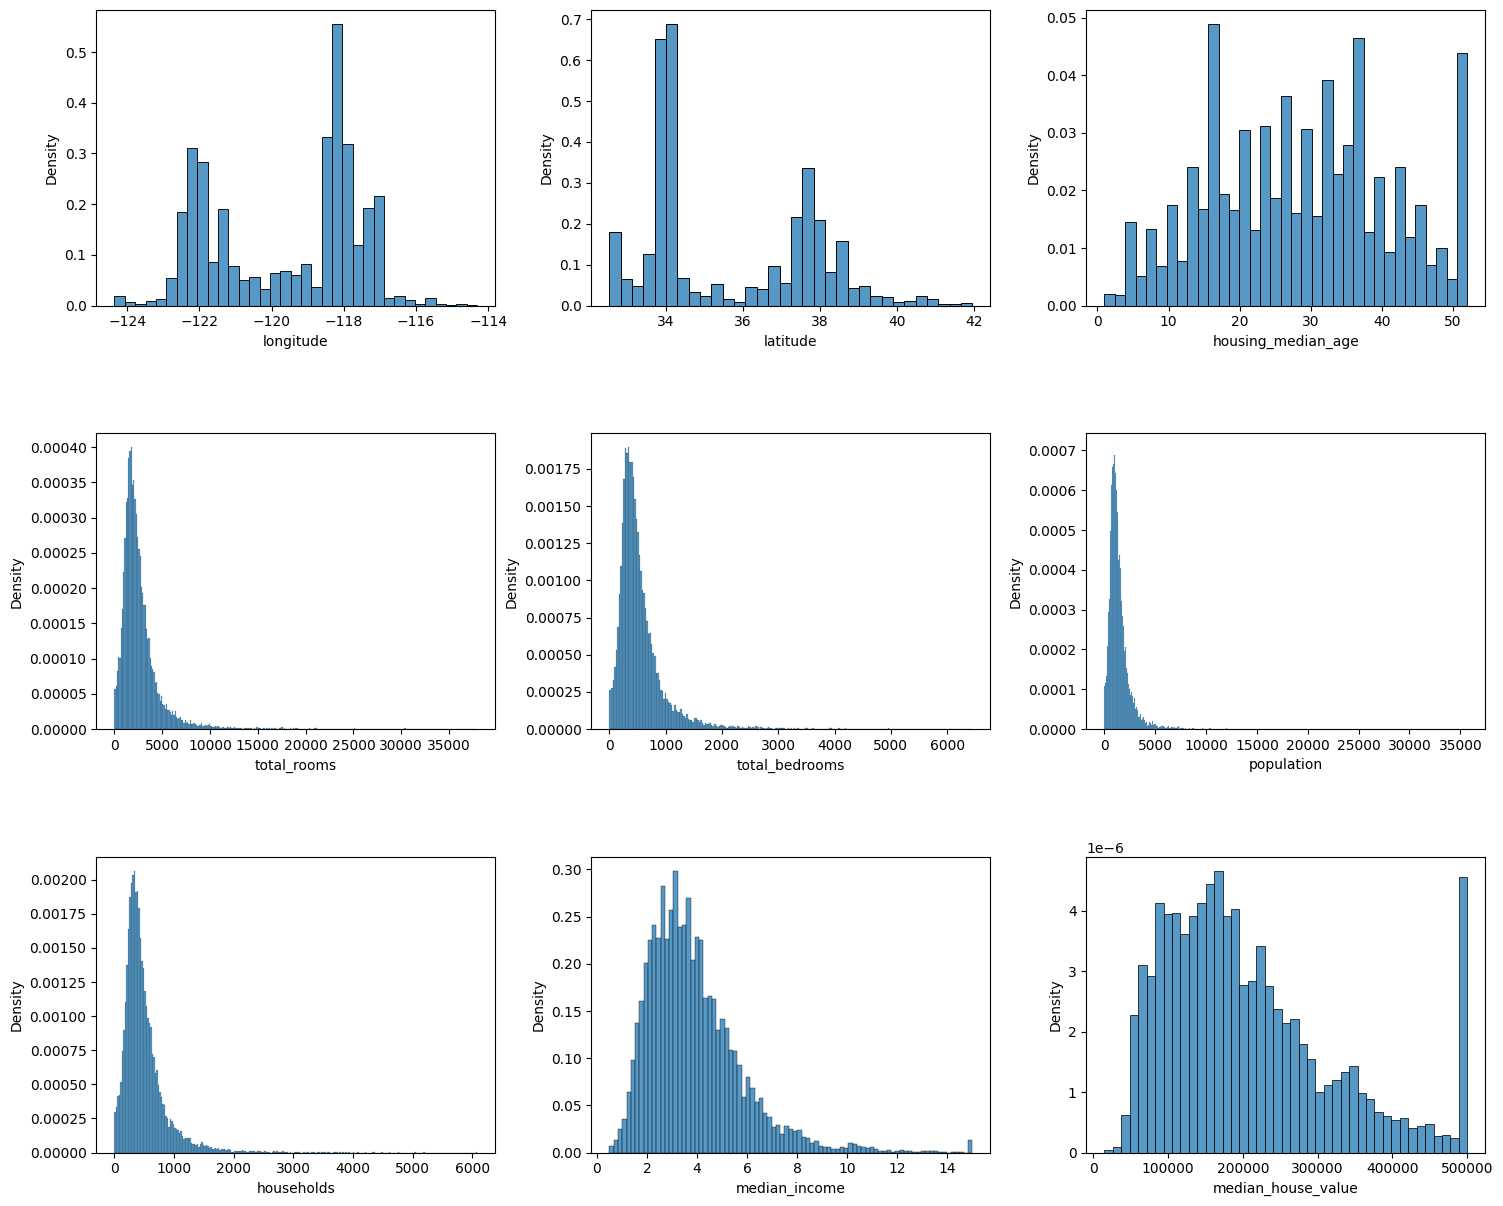

In [ ]:
fig, ax = plt.subplots(ncols=3, nrows=3, figsize=(15, 12))
index = 0
ax = ax.flatten()

for col, value in california_housing_train.items():
    sns.histplot(value, ax=ax[index], stat="density")
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

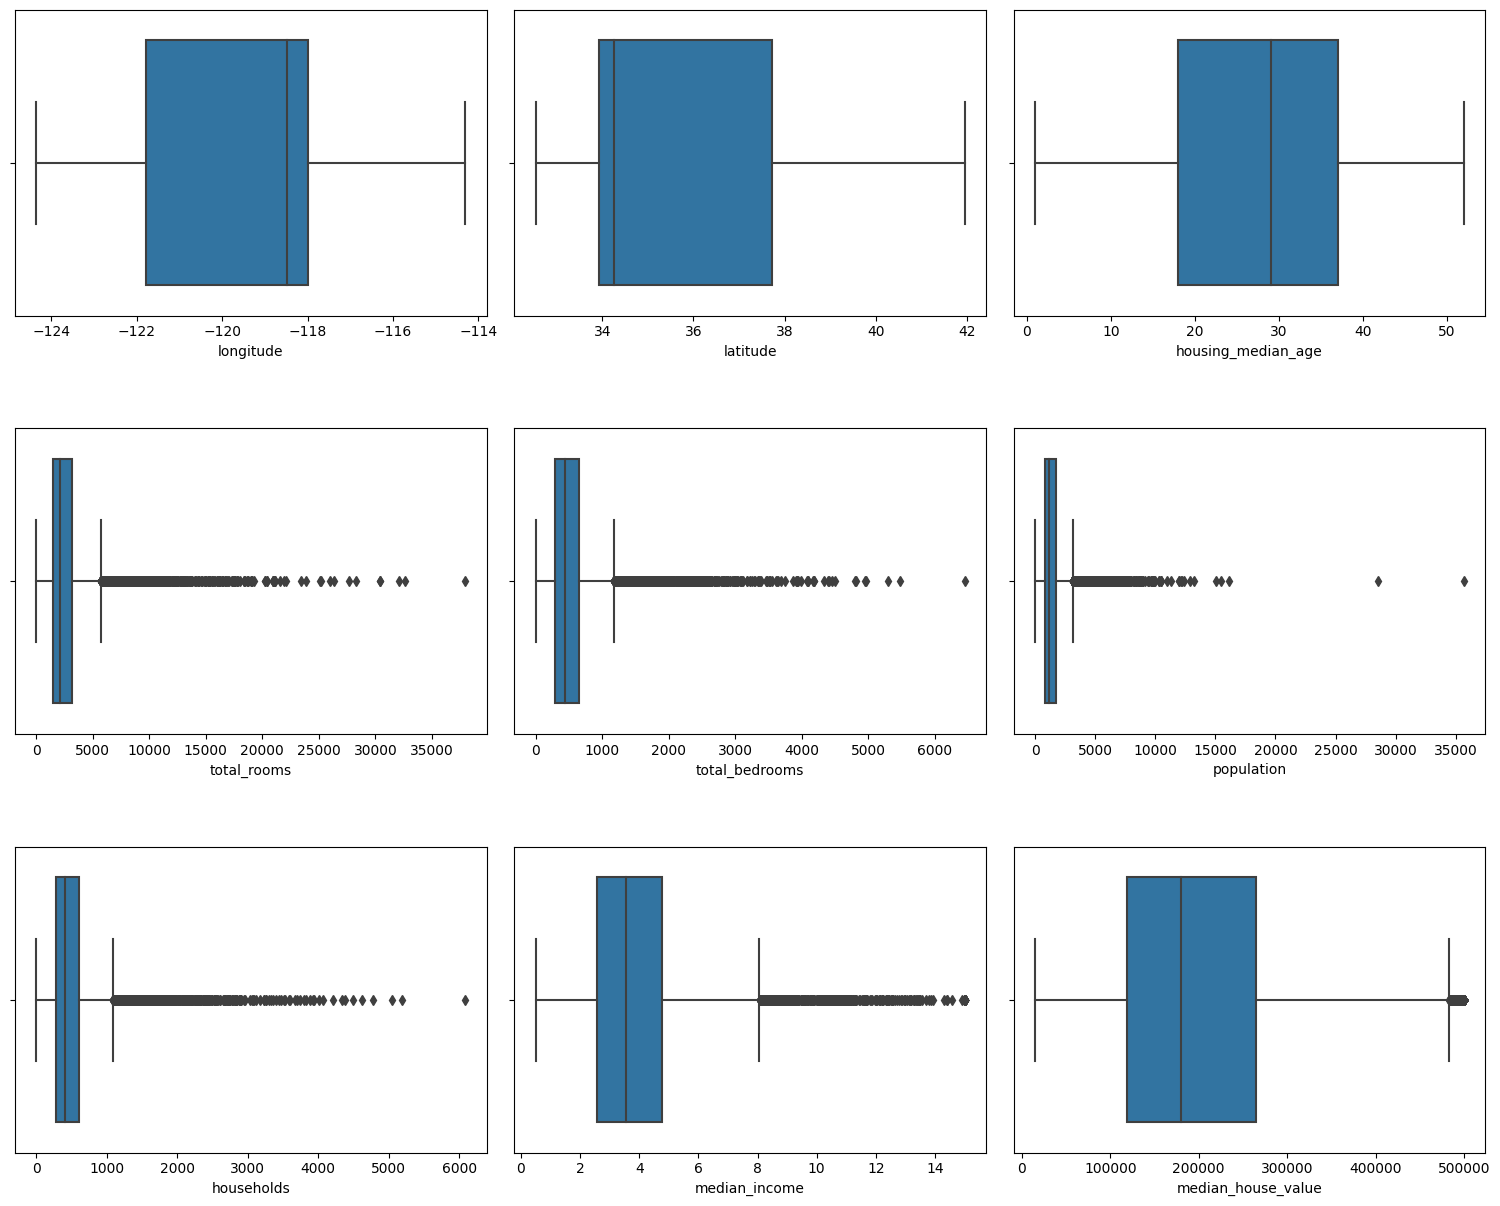

In [ ]:
fig, ax = plt.subplots(ncols=3, nrows=3, figsize=(15,12))
index = 0
ax = ax.flatten()

for col, value in california_housing_train.items():
    sns.boxplot(x=col, data=california_housing_train, ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

### **Coorelation Matrix**
A coefficient of correlation is a value between -1 and +1 that denotes both the strength and directionality of a relationship between two variables.
* The closer the value is to 1 (or -1), the stronger a relationship.
* The closer a number is to 0, the weaker the relationship.

Pearson's Correlation Coefficient fomular:

$r = {{\sum(x_i-\overline{x})(y_i-\overline{y})}\over{\sqrt{\sum(x_i-\overline{x})^2\sum(y_i-\overline{y})^2}}}$

In [ ]:
corr = california_housing_train.corr()
corr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.925208,-0.114250,0.047010,0.071802,0.101674,0.059628,-0.015485,-0.044982
latitude,-0.925208,1.000000,0.016454,-0.038773,-0.069373,-0.111261,-0.074902,-0.080303,-0.144917
housing_median_age,-0.114250,0.016454,1.000000,-0.360984,-0.320434,-0.295890,-0.302754,-0.115932,0.106758
total_rooms,0.047010,-0.038773,-0.360984,1.000000,0.928403,0.860170,0.919018,0.195383,0.130991
total_bedrooms,0.071802,-0.069373,-0.320434,0.928403,1.000000,0.881169,0.980920,-0.013495,0.045783
population,0.101674,-0.111261,-0.295890,0.860170,0.881169,1.000000,0.909247,-0.000638,-0.027850
households,0.059628,-0.074902,-0.302754,0.919018,0.980920,0.909247,1.000000,0.007644,0.061031
median_income,-0.015485,-0.080303,-0.115932,0.195383,-0.013495,-0.000638,0.007644,1.000000,0.691871
median_house_value,-0.044982,-0.144917,0.106758,0.130991,0.045783,-0.027850,0.061031,0.691871,1.000000


<Axes: >

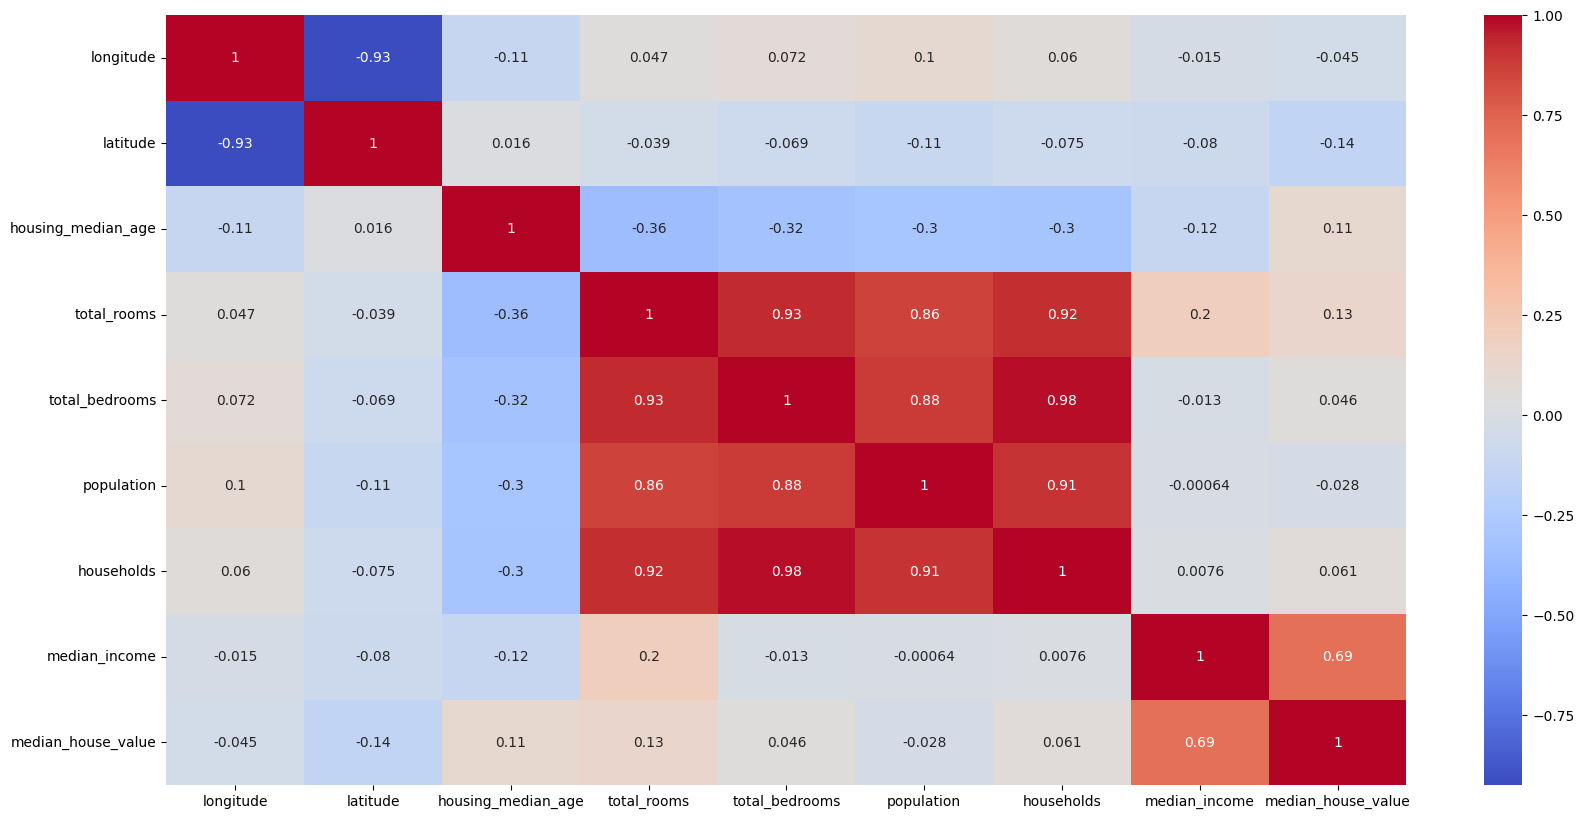

In [ ]:
corr = california_housing_train.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')

<Axes: xlabel='latitude', ylabel='longitude'>

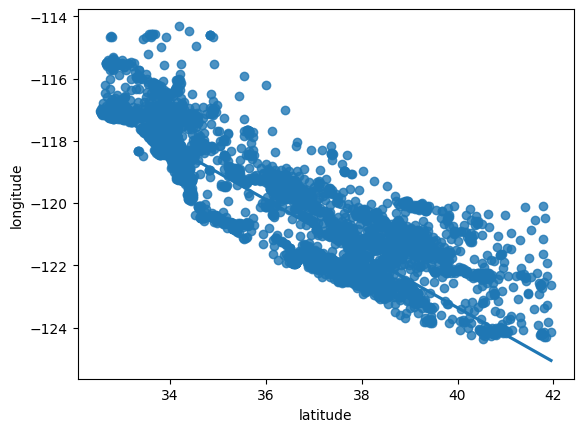

In [ ]:
sns.regplot(y=california_housing_train['longitude'], x=california_housing_train['latitude'])

<Axes: xlabel='median_income', ylabel='median_house_value'>

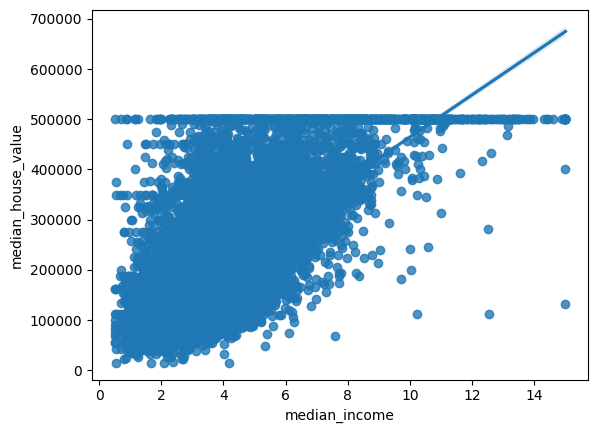

In [ ]:
sns.regplot(y=california_housing_train['median_house_value'], x=california_housing_train['median_income'])

### **Set up dataset**

In [ ]:
X_train = california_housing_train.drop('median_house_value', axis=1)
y_train = california_housing_train.median_house_value
X_test = california_housing_test.drop(['median_house_value'], axis=1)
y_test = california_housing_test.median_house_value

### **Standardization Normalization**

The standard score of a sample x is calculated as:

z = (x - u) / s

where u is the mean of the training samples or zero if with_mean=False, and s is the standard deviation of the training samples or one if with_std=False.

[link at here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

In [ ]:
scalar = preprocessing.StandardScaler()
# fit our data
X_scaled_train = scalar.fit_transform(X_train)
X_scaled_test = scalar.transform(X_test)
X_scaled_train = pd.DataFrame(X_scaled_train, columns=X_train.columns)
X_scaled_test = pd.DataFrame(X_scaled_test, columns=X_test.columns)
X_scaled_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,2.619365,-0.671520,-1.079671,1.361695,1.764204,-0.361184,-0.075998,-1.252543
1,2.539569,-0.573264,-0.761872,2.296608,3.230441,-0.261865,-0.099404,-1.081483
2,2.494683,-0.905463,-0.920772,-0.882462,-0.866956,-0.955354,-0.999252,-1.170105
3,2.489696,-0.928857,-1.159121,-0.524186,-0.480230,-0.796793,-0.715774,-0.362600
4,2.489696,-0.961609,-0.682422,-0.545747,-0.506328,-0.701830,-0.622148,-1.026454


### **Model Training and Prediction**

In [ ]:
# No Scaling
model = LinearRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
print('Root mean squared error: ',mean_squared_error(y_test,y_predict, squared=False))

Root mean squared error:  69765.36022216761


In [ ]:
y_true = [3, -0.5 , 4, 6]
y_pre = [3.5, -0.75, 4, 5.5]
mse = []
mae = []
for i in range(4):
    mse.append((y_true[i]-y_pre[i])**2)
    mae.append(np.abs(y_true[i]-y_pre[i]))

In [ ]:
np.sum(mae)/4, mean_absolute_error(y_true,y_pre)

(0.3125, 0.3125)

Model Coefficients [-86499.60728226 -91744.05083061  14483.29860201 -18263.60700749
  49587.33777166 -44178.15153005  17470.57604338  77291.55314914]
Independent term 207300.91235294065
Root mean squared error:  69765.36022216805
Mean absolute error:  50352.228257942894


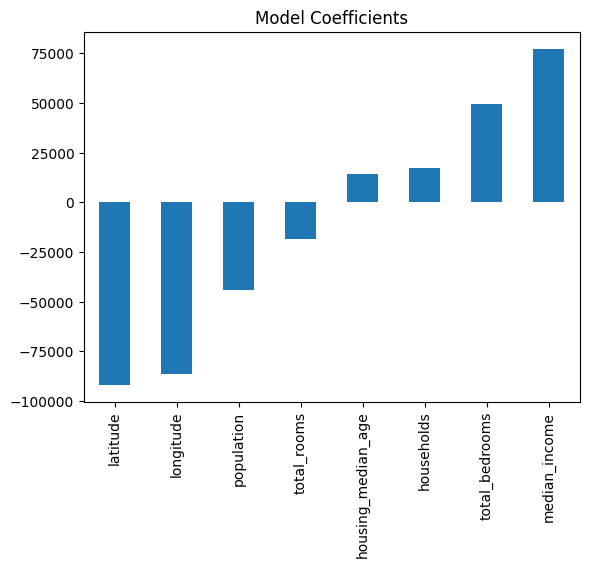

In [ ]:
model = LinearRegression()
model.fit(X_scaled_train, y_train)
coef = pd.Series(model.coef_, X_scaled_train.columns).sort_values()
coef.plot(kind='bar', title='Model Coefficients')
print('Model Coefficients', model.coef_)
print('Independent term', model.intercept_)

y_predict = model.predict(X_scaled_test)
print('Root mean squared error: ',mean_squared_error(y_test,y_predict, squared=False))
print('Mean absolute error: ', mean_absolute_error(y_test, y_predict))

# **Method: Creating New features**

In [ ]:
X_newtrain = X_train.copy()
X_newtest = X_test.copy()

X_newtrain['bedrooms_per_rooms'] = X_newtrain['total_bedrooms'] /X_newtrain['total_rooms']
X_newtrain['total_rooms_per_household'] = X_newtrain['total_rooms']/X_newtrain['households']
X_newtrain['population_per_househod'] = X_newtrain['population']/X_newtrain['households']

X_newtest['bedrooms_per_rooms'] = X_newtest['total_bedrooms'] /X_newtest['total_rooms']
X_newtest['total_rooms_per_household'] = X_newtest['total_rooms']/X_newtest['households']
X_newtest['population_per_househod'] = X_newtest['population']/X_newtest['households']

In [ ]:
X_newtrain

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,bedrooms_per_rooms,total_rooms_per_household,population_per_househod
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,0.228617,11.889831,2.150424
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,0.248497,16.522678,2.438445
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,0.241667,6.153846,2.846154
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,0.224517,6.641593,2.278761
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,0.224209,5.549618,2.381679
...,...,...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,0.177718,6.008130,2.457995
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,0.224777,5.051613,2.567742
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,0.198356,5.870614,2.728070
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,0.206587,5.589958,2.715481



### **Standardization Normalization**

In [ ]:
scalar = preprocessing.StandardScaler()
# fit our data
X_scaled_newtrain = scalar.fit_transform(X_newtrain)
X_scaled_newtest = scalar.transform(X_newtest)
X_scaled_newtrain = pd.DataFrame(X_scaled_newtrain, columns=X_newtrain.columns)
X_scaled_newtest = pd.DataFrame(X_scaled_newtest, columns=X_newtest.columns)
X_scaled_newtrain.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,bedrooms_per_rooms,total_rooms_per_household,population_per_househod
0,2.619365,-0.671520,-1.079671,1.361695,1.764204,-0.361184,-0.075998,-1.252543,0.274246,2.540559,-0.204549
1,2.539569,-0.573264,-0.761872,2.296608,3.230441,-0.261865,-0.099404,-1.081483,0.618055,4.365146,-0.133217
2,2.494683,-0.905463,-0.920772,-0.882462,-0.866956,-0.955354,-0.999252,-1.170105,0.499931,0.281516,-0.032242
3,2.489696,-0.928857,-1.159121,-0.524186,-0.480230,-0.796793,-0.715774,-0.362600,0.203333,0.473608,-0.172765
4,2.489696,-0.961609,-0.682422,-0.545747,-0.506328,-0.701830,-0.622148,-1.026454,0.198008,0.043548,-0.147276


### **Training Model and Prediction**

Root mean squared error:  68888.71728575075
Mean absolute error:  49503.57424406093


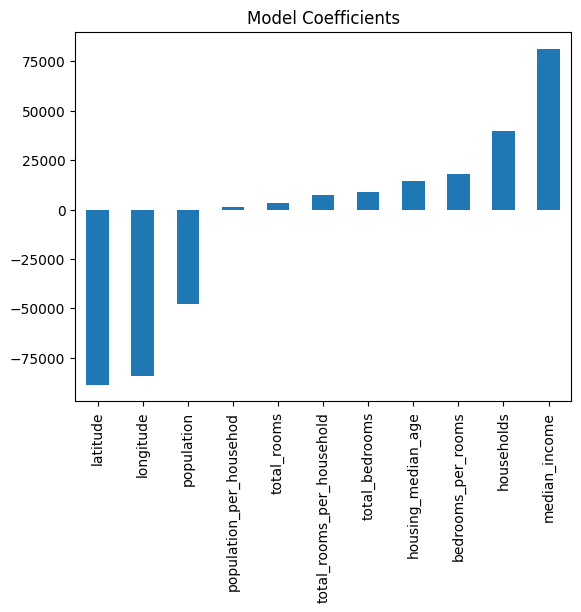

In [ ]:
model = LinearRegression()
model.fit(X_scaled_newtrain, y_train)
coef = pd.Series(model.coef_, X_scaled_newtrain.columns).sort_values()
coef.plot(kind='bar', title='Model Coefficients')

y_newpredict = model.predict(X_scaled_newtest)
print('Root mean squared error: ', np.sqrt(mean_squared_error(y_test, y_newpredict)))
print('Mean absolute error: ', mean_absolute_error(y_test, y_newpredict))

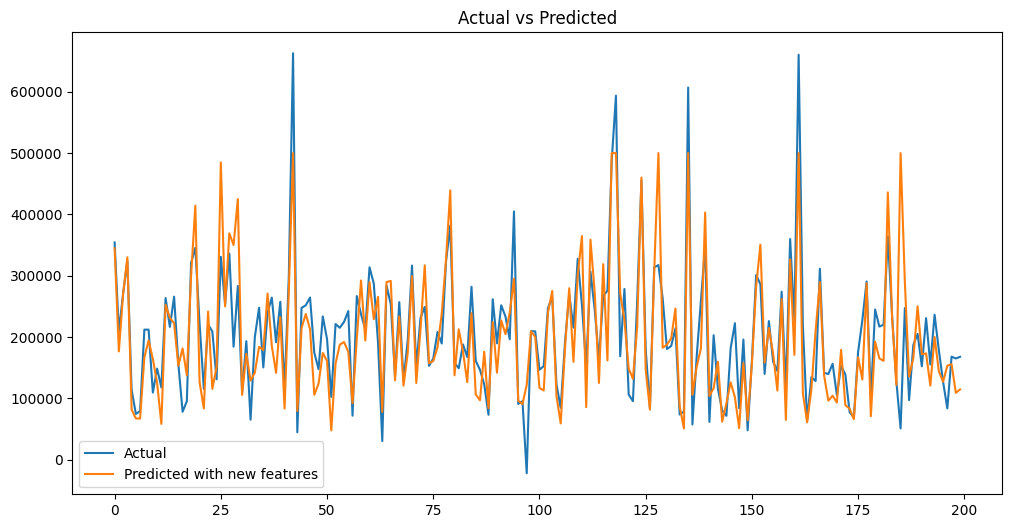

In [ ]:
fig= plt.figure(figsize=(12,6))
result = pd.DataFrame({'Predicted with new features':y_newpredict, 'Actual':y_test})
plt.plot(result[:200])
plt.legend(['Actual','Predicted with new features'])
plt.title('Actual vs Predicted')
plt.show()